In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        './handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

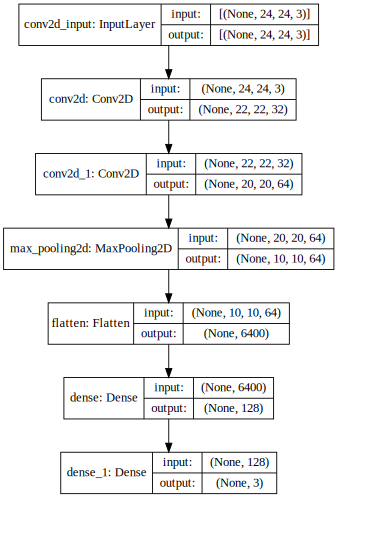

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 1s 57ms/step - loss: 1.2535 - accuracy: 0.4887 - val_loss: 0.4770 - val_accuracy: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.3159 - accuracy: 0.8769 - val_loss: 0.6518 - val_accuracy: 0.7333
Epoch 3/50
15/15 [==============================] - 0s 13ms/step - loss: 0.1299 - accuracy: 0.9232 - val_loss: 0.1554 - val_accuracy: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0250 - accuracy: 0.9771 - val_loss: 0.1028 - val_accuracy: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1155 - val_accuracy: 0.9333
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 8.1328e-04 - accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 8/5

In [8]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 93.33%


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [9]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 1.000 0.000]
 [0.457 0.423 0.120]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.001 0.999]
 [1.000 0.000 0.000]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
